In [34]:
import networkx as nx
import matplotlib.pyplot as plt

# G = nx.DiGraph()
# G.add_edges_from(
#     [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
#      ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

# val_map = {'A': 1.0,
#            'D': 0.5714285714285714,
#            'H': 0.0}

# values = [val_map.get(node, 0.25) for node in G.nodes()]

# # Specify the edges you want here
# red_edges = [('A', 'C'), ('E', 'C')]
# edge_colours = ['black' if not edge in red_edges else 'red'
#                 for edge in G.edges()]
# black_edges = [edge for edge in G.edges() if edge not in red_edges]

# # Need to create a layout when doing
# # separate calls to draw nodes and edges
# pos = nx.spring_layout(G)
# nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
#                        node_color = values, node_size = 500)
# nx.draw_networkx_labels(G, pos)
# nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color='r', arrows=True)
# nx.draw_networkx_edges(G, pos, edgelist=black_edges, arrows=False)
# plt.show()

In [35]:
from py2neo import Graph, NodeMatcher
import networkx as nx

from neo4j_to_networkx import get_rels_from_db, add_nodes, add_rels

In [36]:
def connect_graph():
    graph = Graph("http://localhost:7474/db/data/", user='neo4j', password='119678Qq')
    return graph

In [37]:
def get_nodes_from_db(graph):
    graph = connect_graph()
    matcher = NodeMatcher(graph)
    nodes = list(matcher.match('COORDINATE'))

    nodes_data = []
    for node in nodes:
        node_json = {'longitude': node['longitude'], 'latitude': node['latitude'], 'pk': node.identity}
        nodes_data.append(node_json)

    return nodes_data

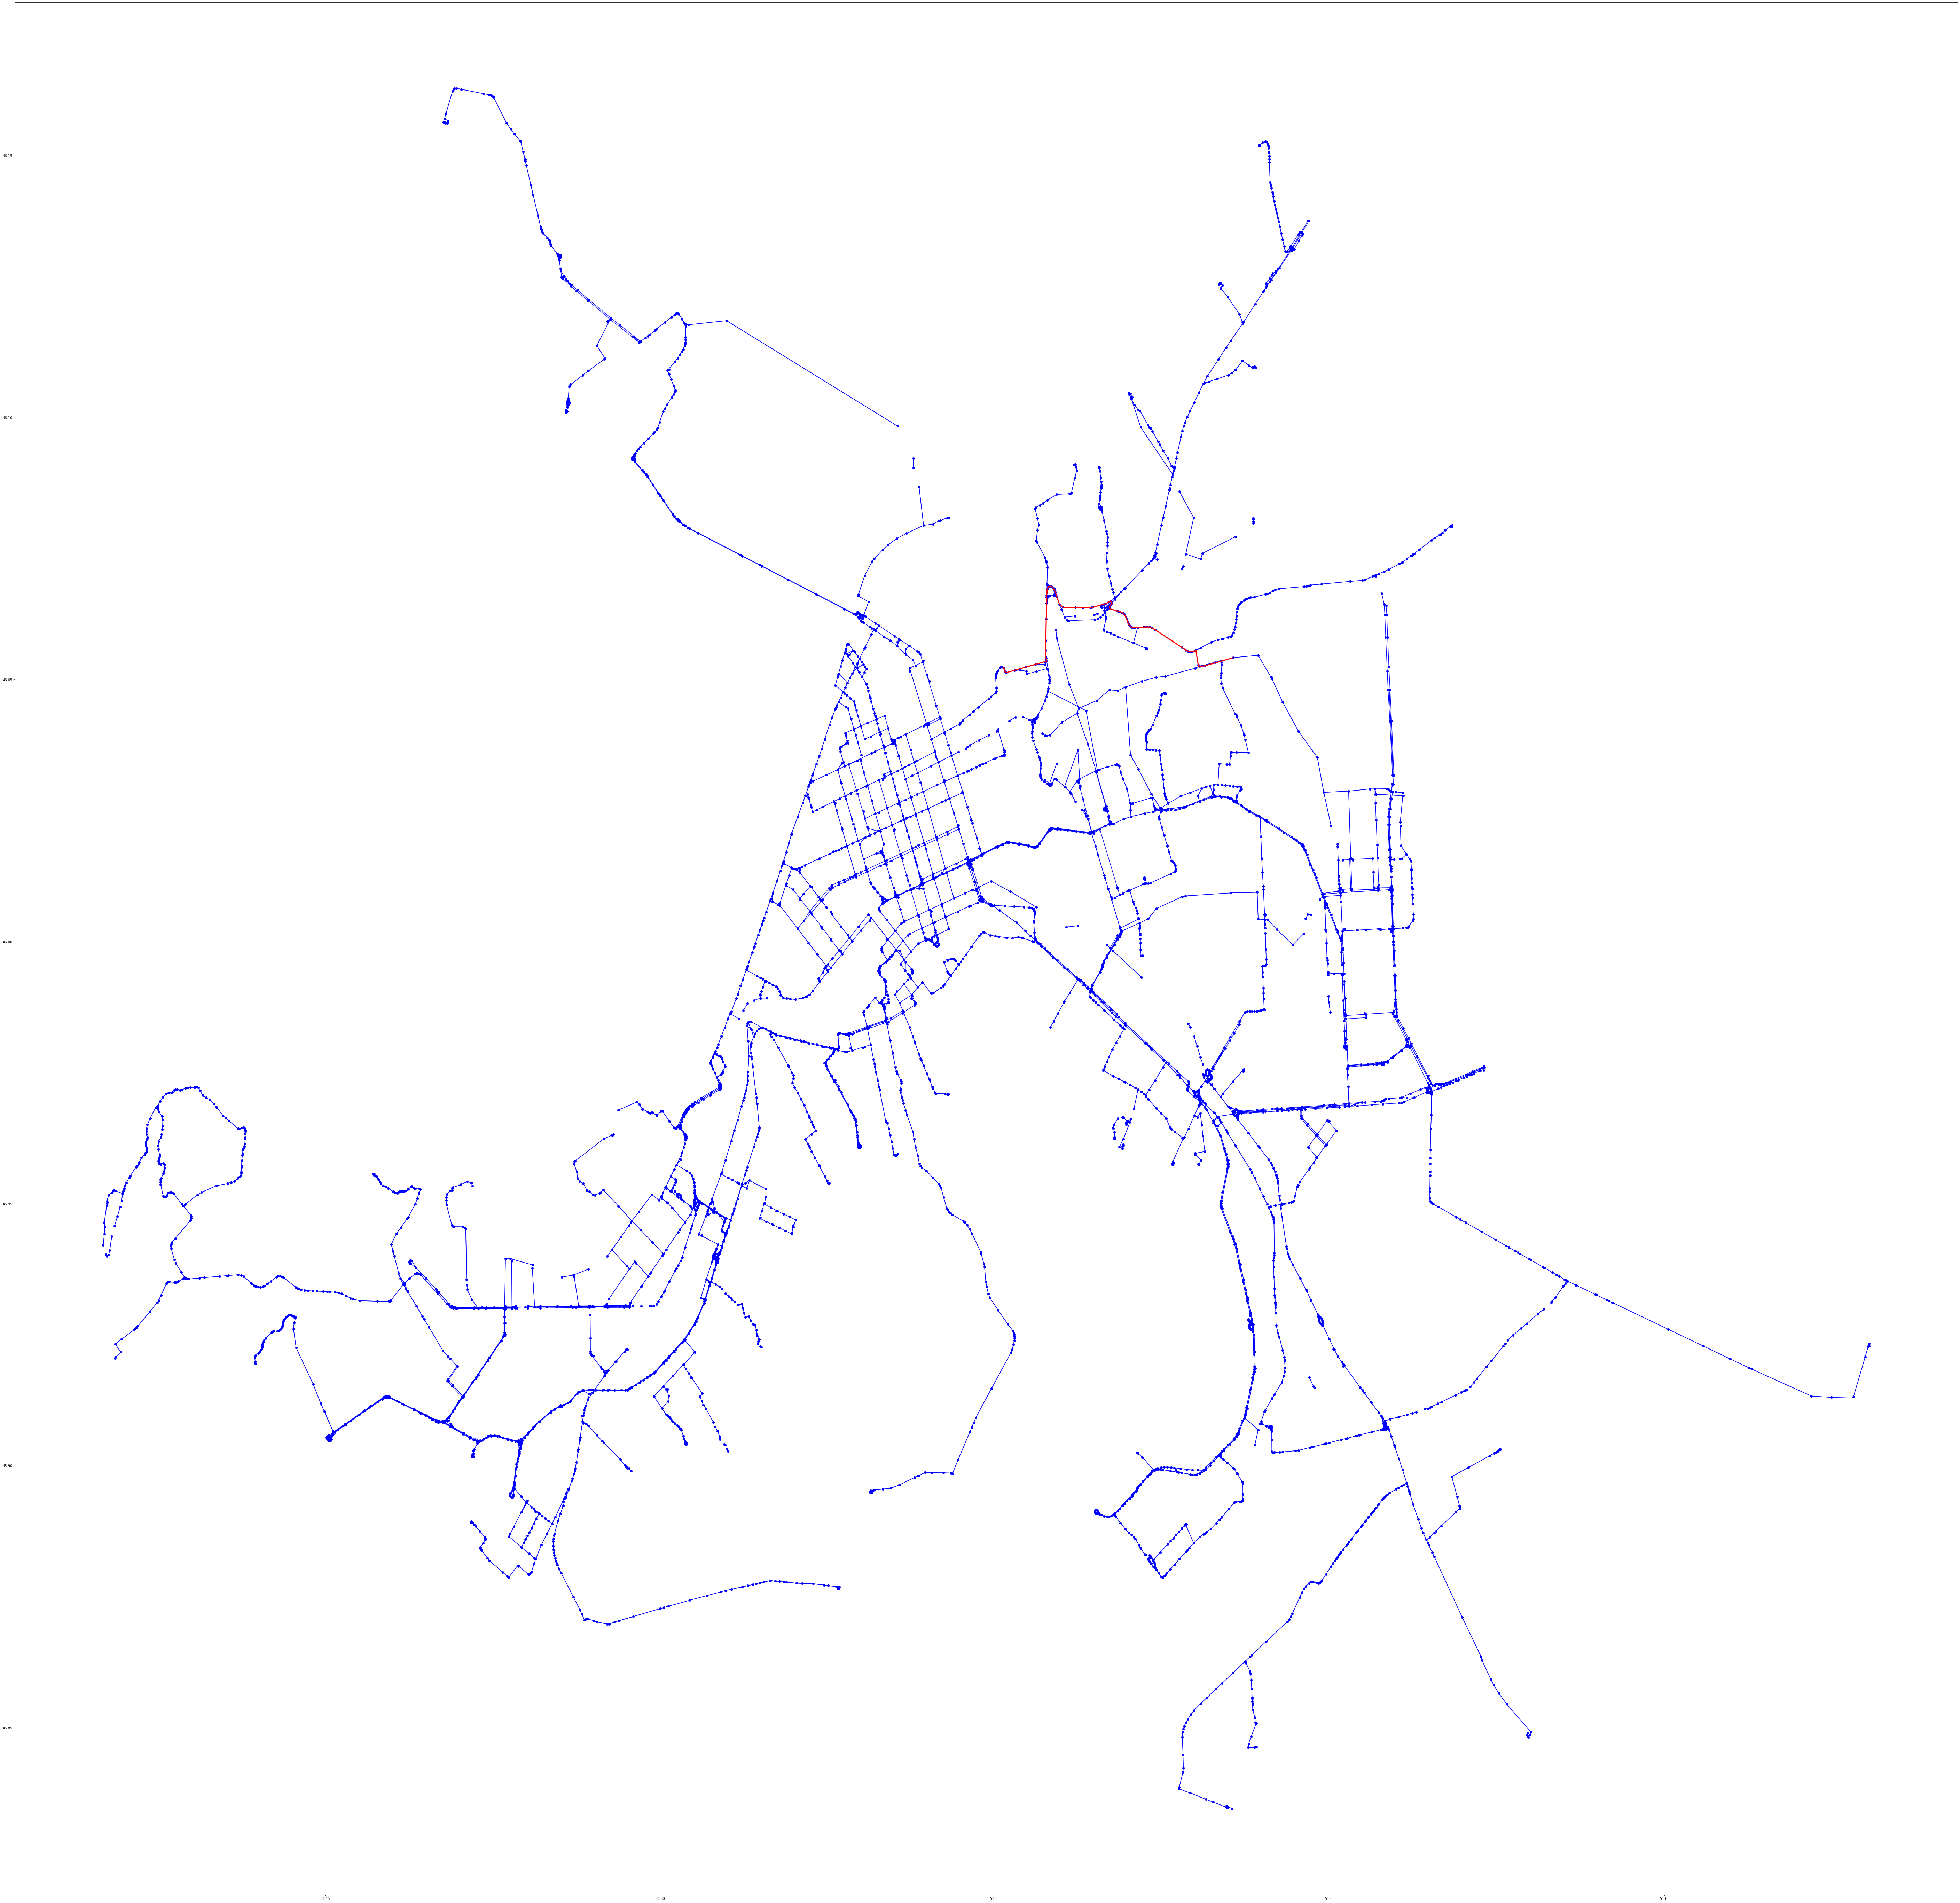

In [61]:
neo4j_graph = connect_graph()
G = nx.MultiDiGraph()
nodes = get_nodes_from_db(neo4j_graph)
add_nodes(G, get_nodes_from_db(neo4j_graph))
add_rels(G, get_rels_from_db(neo4j_graph))
path = list(nx.shortest_path(G, 4641, 12045, weight='time'))
plt.figure(figsize=(100,100))



latitudes = [node['latitude'] for node in nodes]
longitudes = [node['longitude'] for node in nodes]

plt.plot(latitudes, longitudes, 'bo')
rels = get_rels_from_db(neo4j_graph)
for rel in rels:
    node1 = next(iter(item for item in nodes if item['pk'] == rel['node_id_from']), None)
    node2 = next(iter(item for item in nodes if item['pk'] == rel['node_id_to']), None)
    if (node1 is not None) and (node2 is not None):
        latitudes1 = [node1['latitude'], node2['latitude']]
        longitudes1 = [node1['longitude'], node2['longitude']]
        plt.plot(latitudes1, longitudes1, 'b-')

        
for node in path:
    node1 = next(iter(item for item in nodes if item['pk'] == node), None)
    try:
        node2 = next(iter(item for item in nodes if item['pk'] == path[path.index(node)+1]), None)
    except Exception:
        continue
    if (node1 is not None) and (node2 is not None):
        latitudes1 = [node1['latitude'], node2['latitude']]
        longitudes1 = [node1['longitude'], node2['longitude']]
        plt.plot(latitudes1, longitudes1, 'r-', linewidth=3.0)
        
plt.savefig("test.png")

# plt.show()
# add_nodes(G, get_nodes_from_db(neo4j_graph))
# add_rels(G, get_rels_from_db(neo4j_graph))

In [40]:
# pos = nx.spring_layout(G)
# nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size = 10)
# nx.draw_networkx_labels(G, pos)
# nx.draw_networkx_edges(G, pos, edge_color='r', arrows=True)
# plt.show()